In [1]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import linregress
from scipy.stats import chisquare
from scipy import stats

# import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain, repeat
import pickle
import re
from math import exp, log

# Set Seaborn style
sns.set(style="whitegrid")
plt.style.use("ggplot")
sns.set_context("talk")
%matplotlib inline

In [11]:
[round(x) for x in np.linspace(0, 10000, 7).tolist()]

[0, 1667, 3333, 5000, 6667, 8333, 10000]

In [3]:
int(10000 / 6)

1666

In [13]:
random.randrange(0, 9)

4

In [15]:
chromosomeLocation = [0, 474, 687, 524]
for prime5, prime3 in zip(chromosomeLocation, chromosomeLocation[1:]):
    print(prime5, prime3)

0 474
474 687
687 524


In [12]:
nums = np.random.choice([0, 1], size=1000, p=[0.1, 0.9]).tolist()

In [14]:
l = [1, 2, 3, 4, 5, 6, 7, 8, 9]
l[3:9]

[4, 5, 6, 7, 8, 9]

In [18]:
np.nonzero([1, 0, 2])[0].tolist()

[0, 2]

In [3]:
k = np.zeros((1000, 5,))

In [18]:
np.all(k[:, 0:2] == 0)

True

In [17]:
len(k[:, 0:2])

1000

Text(0.05, 0.5, 'Avg. copy number')

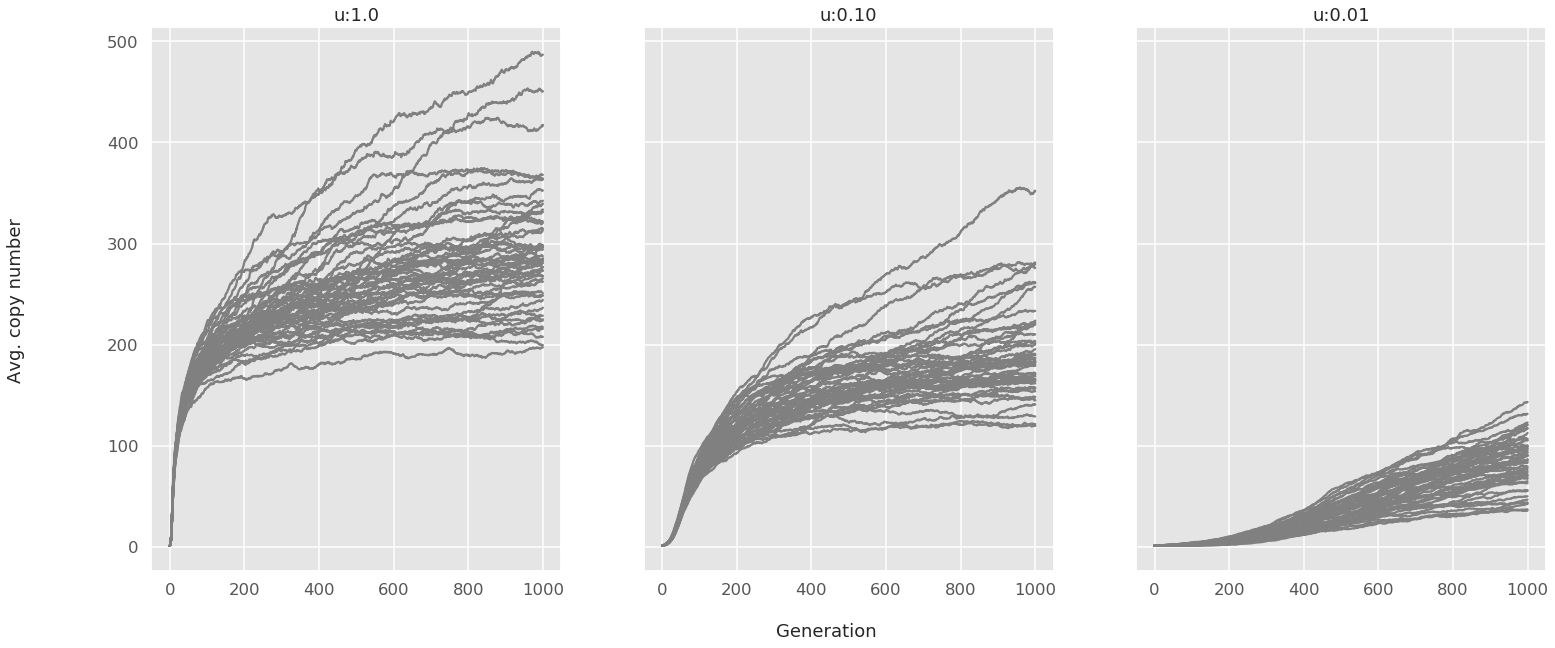

In [5]:
# Set up the figure
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(25, 10),)
# Load file from the pickle
fileName = "/home/siddharth/Documents/Projects/Simulicron/notebooks/UnitTestResults/K1/4/K2u100.pickle"
with open(fileName, "rb") as f:
    result = pickle.load(f)
# Plot the average copy number
for i in result:
    f = sns.lineplot(
        x=np.arange(len(i["AvgCopyNum"])),
        y=i["AvgCopyNum"],
        color="grey",
        ax=ax1,
    ).set_title("u:1.0")
# Load file from the pickle
fileName = "/home/siddharth/Documents/Projects/Simulicron/notebooks/UnitTestResults/K1/4/K2U010.pickle"
with open(fileName, "rb") as f:
    result = pickle.load(f)
# Plot the average copy number
for i in result:
    sns.lineplot(
        x=np.arange(len(i["AvgCopyNum"])),
        y=i["AvgCopyNum"],
        color="grey",
        ax=ax2,
    ).set_title("u:0.10")
# Load file from the pickle
fileName = "/home/siddharth/Documents/Projects/Simulicron/notebooks/UnitTestResults/K1/4/K2U001.pickle"
with open(fileName, "rb") as f:
    result = pickle.load(f)
# Plot the average copy number
for i in result:
    sns.lineplot(
        x=np.arange(len(i["AvgCopyNum"])),
        y=i["AvgCopyNum"],
        color="grey",
        ax=ax3,
    ).set_title("u:0.01")


fig = ax1.figure
fig.text(0.5, 0.04, "Generation", ha="center", va="center", size=18)
fig.text(
    0.05,
    0.5,
    "Avg. copy number",
    ha="center",
    va="center",
    rotation=90,
    size=18,
)